<a href="https://colab.research.google.com/github/SarahKachingwe/SarahKachingwe.github.io/blob/main/MalariaPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


warnings.filterwarnings('ignore')

# Load Malaria dataset
path = '/content/Kenya Malaria_Prediction Dataset by who.csv'
df = pd.read_csv(path)
df.head()

,Patient ID,Age,Gender,Region,Fever,Headache,Chills,Sweats,Fatigue,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Parasite Detected,Diagnosis
0,1,52,Male,Rural,Yes,No,Yes,No,Yes,12.2,367281,10578,No,Negative
1,2,93,Male,Rural,Yes,Yes,No,Yes,Yes,11.5,261529,6367,Yes,Negative
2,3,15,Male,Rural,Yes,Yes,Yes,No,No,12.5,383009,11904,No,Negative
3,4,72,Female,Urban,Yes,No,Yes,No,No,12.7,245800,11793,No,Negative
4,5,61,Male,Rural,No,Yes,Yes,No,No,11.6,379350,10677,No,Negative


In [ ]:
# summary of the data
df.info()
# check for null values and duplicate
df.isnull()
df.isna()
df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient ID           5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   Gender               5000 non-null   object 
 3   Region               5000 non-null   object 
 4   Fever                5000 non-null   object 
 5   Headache             5000 non-null   object 
 6   Chills               5000 non-null   object 
 7   Sweats               5000 non-null   object 
 8   Fatigue              5000 non-null   object 
 9   Hemoglobin (g/dL)    5000 non-null   float64
 10  Platelet (cells/μL)  5000 non-null   int64  
 11  WBC (cells/μL)       5000 non-null   int64  
 12  Parasite Detected    5000 non-null   object 
 13  Diagnosis            5000 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 547.0+ KB


,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


Exploratory Data Analysis

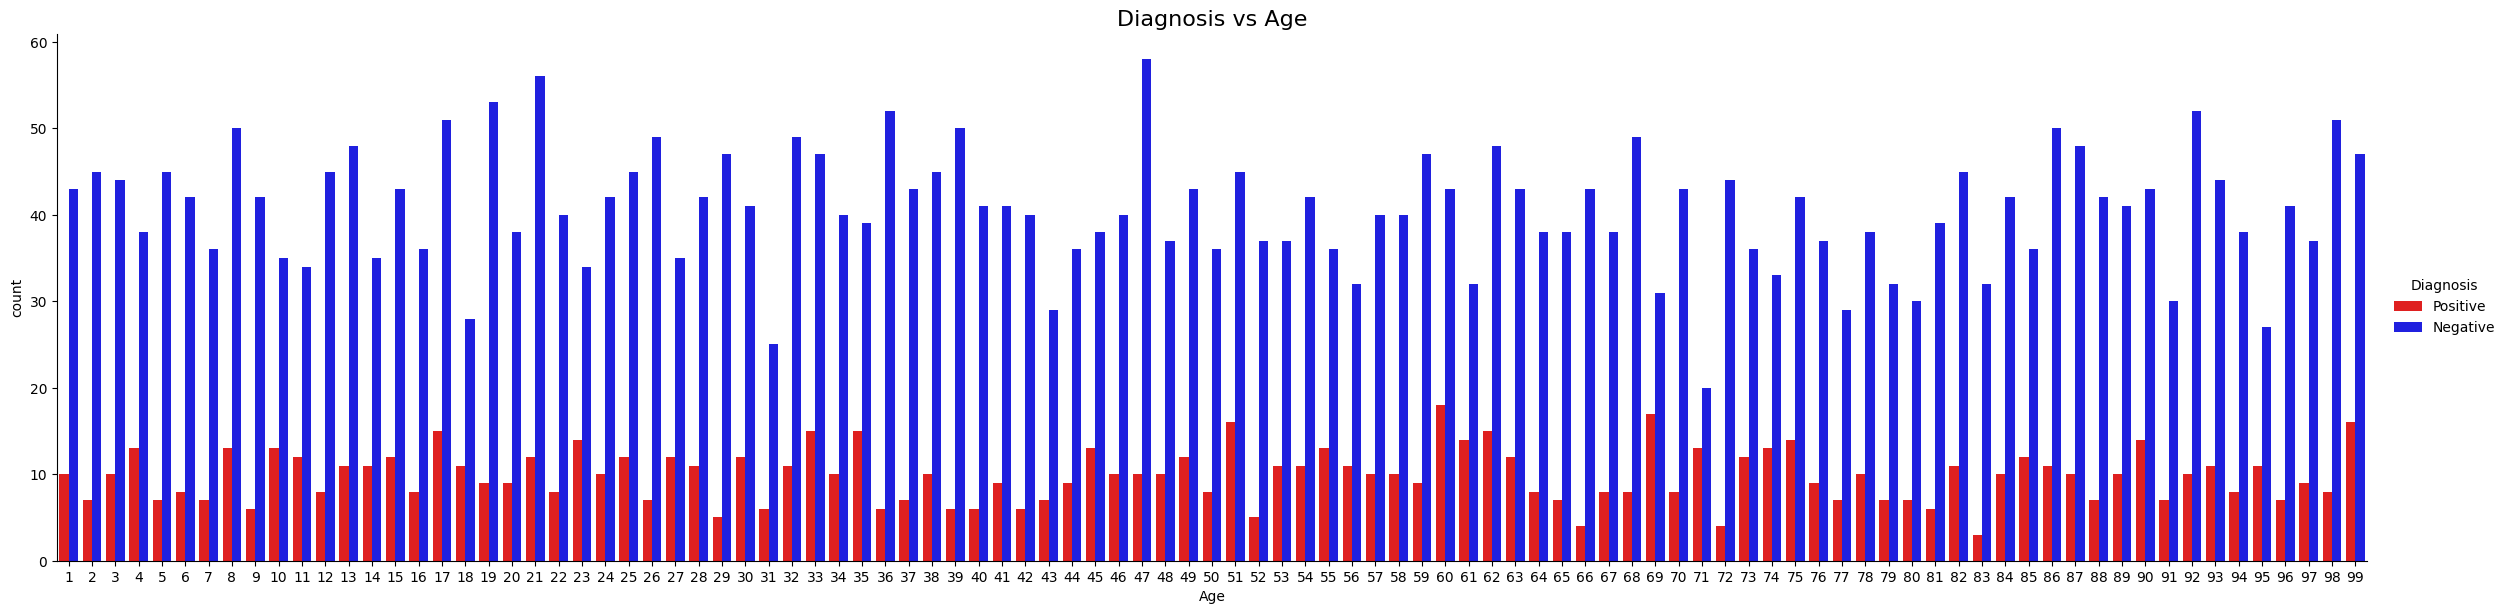

In [ ]:
# Exploratary Data Analysis

# create a plot for using catplot for Age and Diagnosis
custom_palette = {"Negative":"blue", "Positive": "red"}
sns.catplot(data=df, x="Age",hue="Diagnosis",kind="count", height=6, aspect=4,palette=custom_palette)

# Adding a title to the catplot
plt.title("Diagnosis vs Age", fontsize=16)
plt.show()

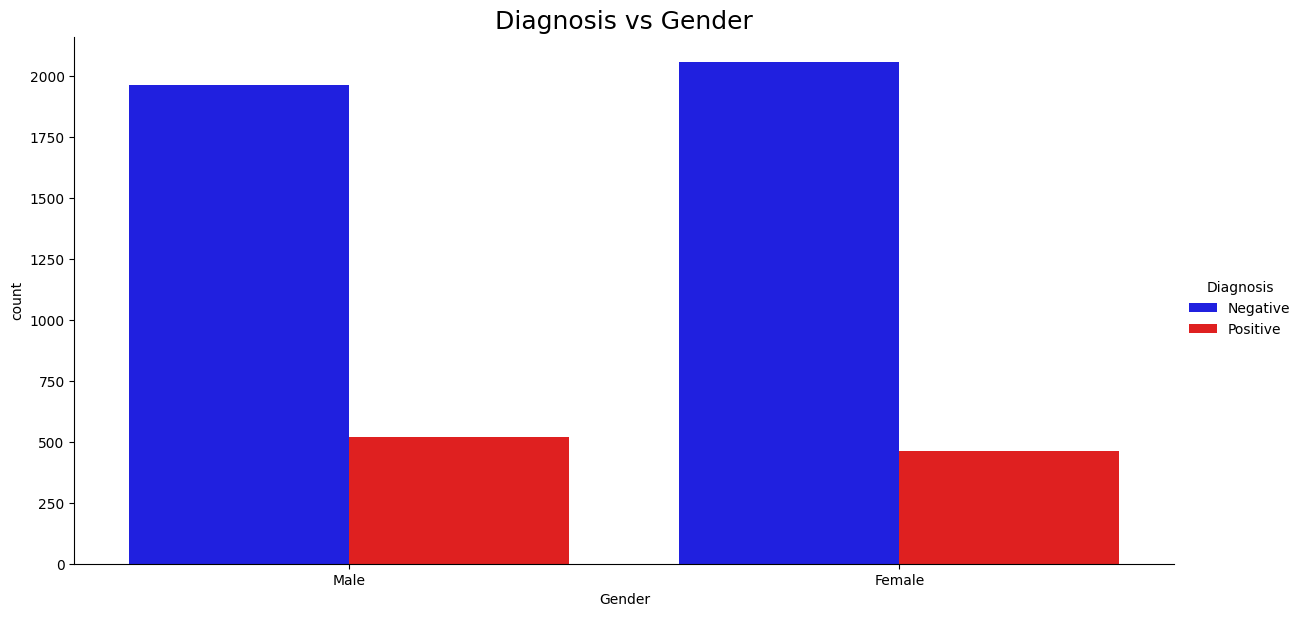

In [ ]:
# create a plot for using catplot for Gender and Diagnosis
custom_palette = {"Negative":"blue", "Positive": "red"}
sns.catplot(data=df, x="Gender",hue="Diagnosis",kind="count", height=6, aspect=2,palette=custom_palette)

# Adding a title to the catplot
plt.title("Diagnosis vs Gender", fontsize=18)
plt.show()

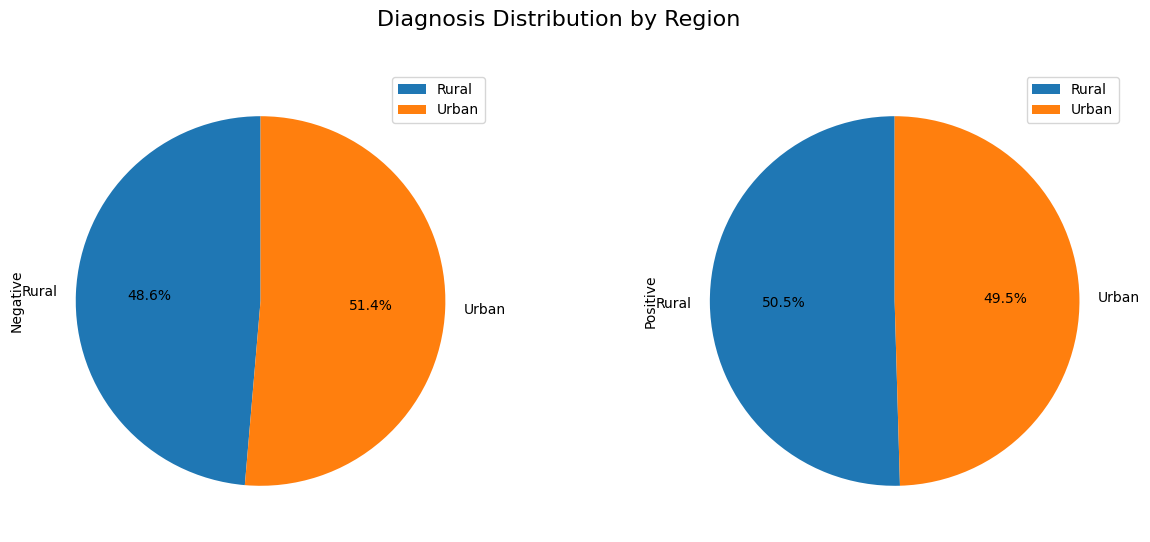

In [ ]:
# create a pie chart for Region and Diagnoss
# create a pie chart for Region and Diagnosis
# Group by region and count the occurrences of each diagnosis
region_diagnosis_counts = df.groupby(['Region', 'Diagnosis'])['Diagnosis'].count().unstack()

# Plot the pie chart
region_diagnosis_counts.plot(kind='pie', subplots=True, figsize=(15, 6), autopct='%1.1f%%', startangle=90)

# Add a title
plt.suptitle('Diagnosis Distribution by Region', fontsize=16)
plt.show()

In [ ]:
# label encoding categorical data


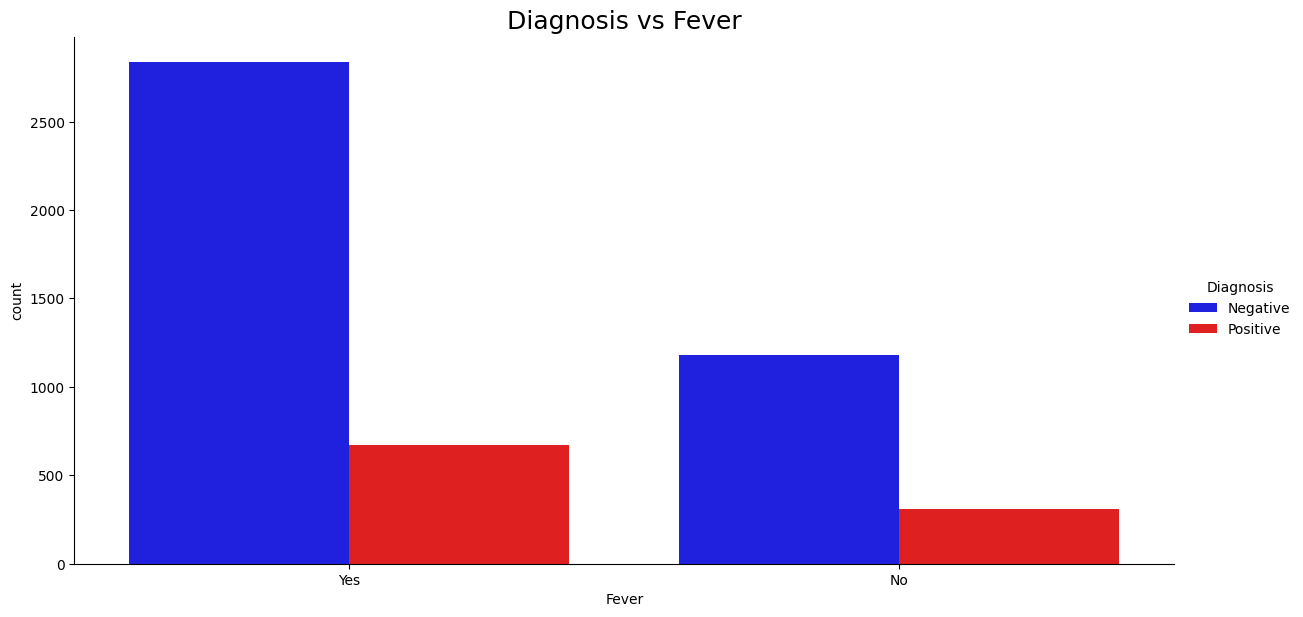

In [25]:
# create a plot for using catplot for Gender and Diagnosis
custom_palette = {"Negative":"blue", "Positive": "red"}
sns.catplot(data=df, x="Fever",hue="Diagnosis",kind="count", height=6, aspect=2,palette=custom_palette)

# Adding a title to the catplot
plt.title("Diagnosis vs Fever", fontsize=18)
plt.show()

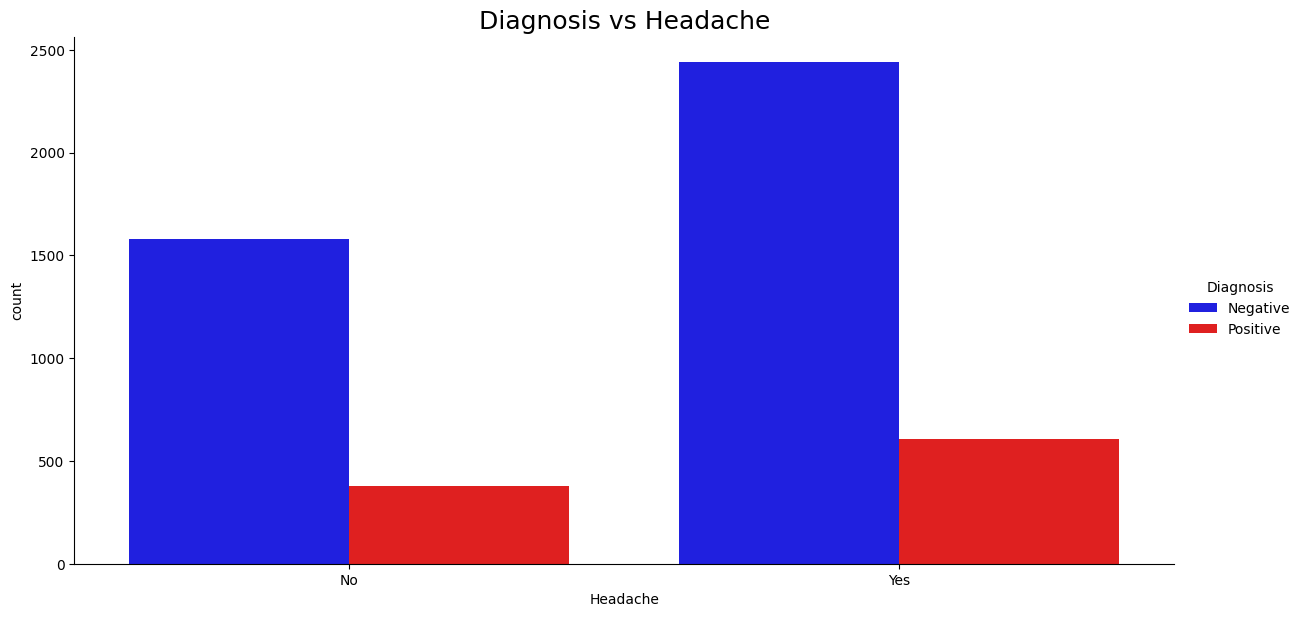

In [26]:
# create a plot for using catplot for Headache and Diagnosis
custom_palette = {"Negative":"blue", "Positive": "red"}
sns.catplot(data=df, x="Headache",hue="Diagnosis",kind="count", height=6, aspect=2,palette=custom_palette)

# Adding a title to the catplot
plt.title("Diagnosis vs Headache", fontsize=18)
plt.show()

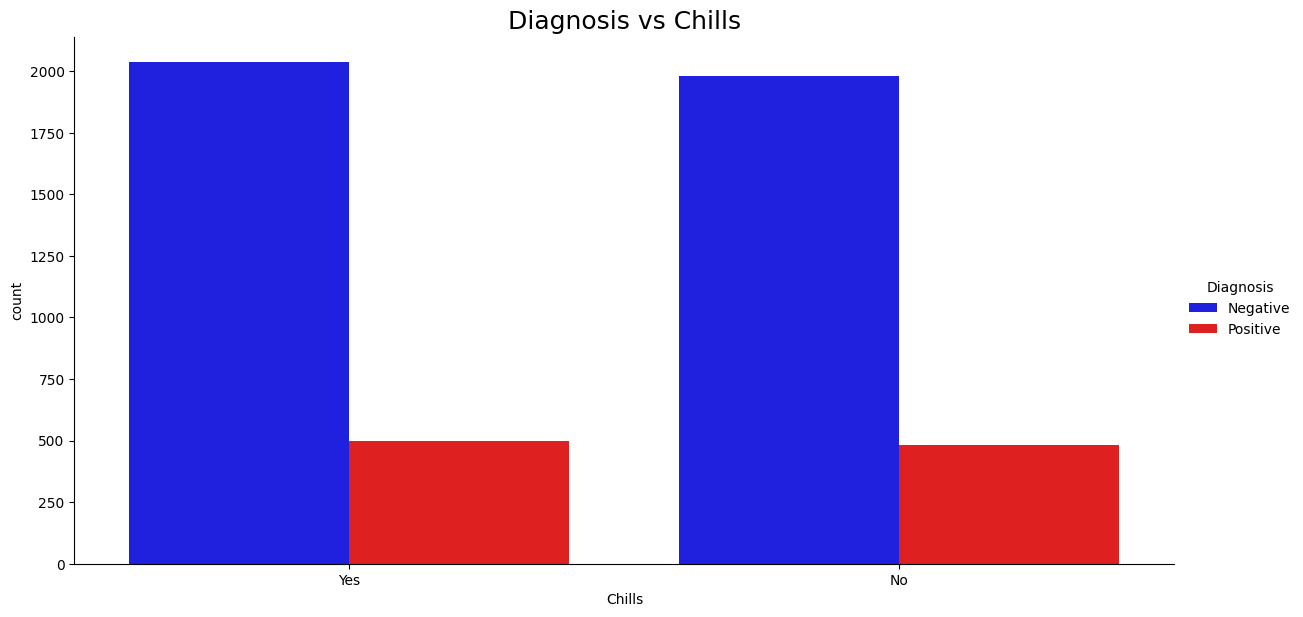

In [27]:
# create a plot for using catplot for Chills and Diagnosis
custom_palette = {"Negative":"blue", "Positive": "red"}
sns.catplot(data=df, x="Chills",hue="Diagnosis",kind="count", height=6, aspect=2,palette=custom_palette)

# Adding a title to the catplot
plt.title("Diagnosis vs Chills", fontsize=18)
plt.show()

In [ ]:
# create a plot for using catplot for Gender and Diagnosis
custom_palette = {"Negative":"blue", "Positive": "red"}
sns.catplot(data=df, x="Gender",hue="Diagnosis",kind="count", height=6, aspect=2,palette=custom_palette)

# Adding a title to the catplot
plt.title("Diagnosis vs Gender", fontsize=18)
plt.show()

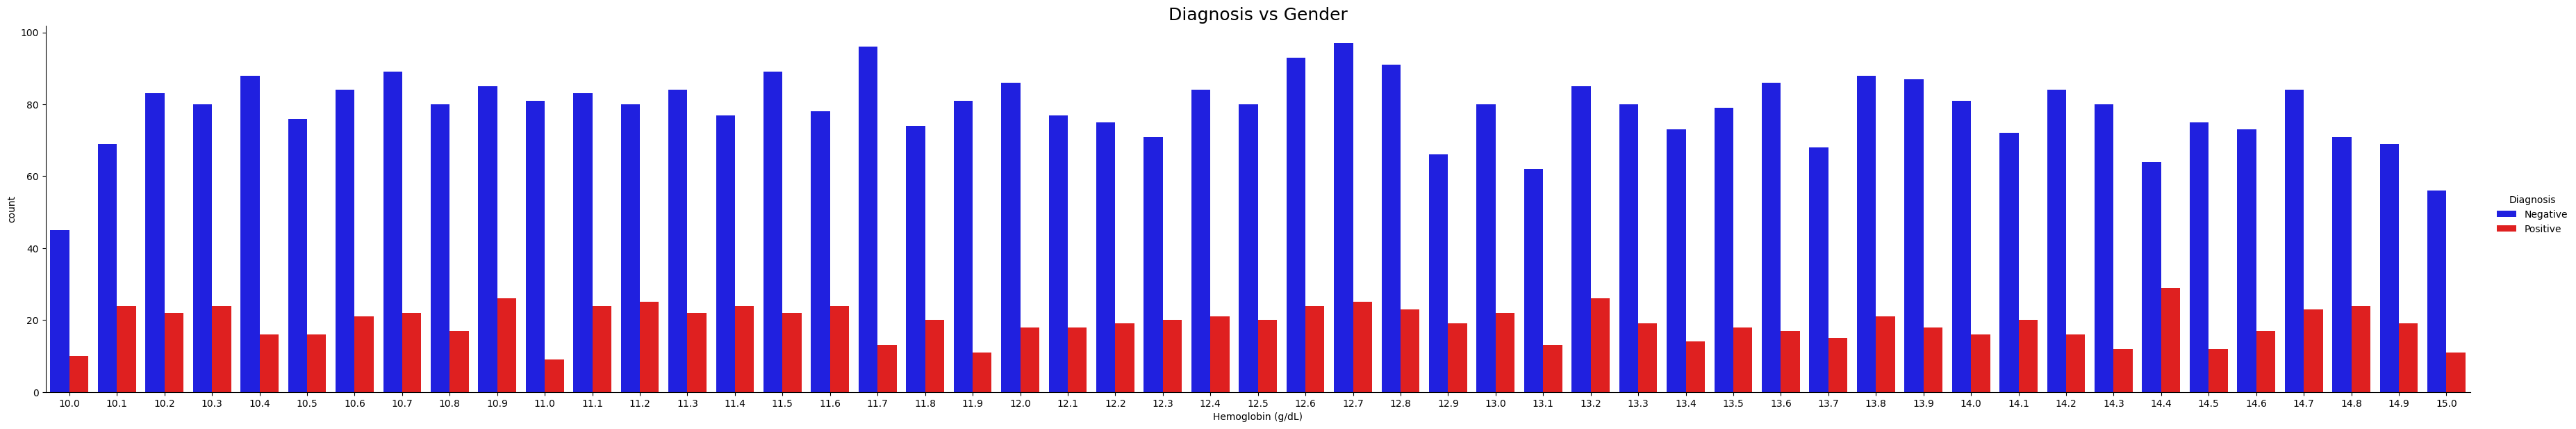

In [3]:
# create a plot for using catplot for Hemoglobin (g/dL) and Diagnosis
custom_palette = {"Negative":"blue", "Positive": "red"}
sns.catplot(data=df, x="Hemoglobin (g/dL)",hue="Diagnosis",kind="count", height=6, aspect=6,palette=custom_palette)

# Adding a title to the catplot
plt.title("Diagnosis vs Gender", fontsize=18)
plt.show()

In [25]:
# label encoding categorical variables
# loop through each categorical column and apply label encoder
encoder=LabelEncoder()
columns = ['Age','Gender','Region','Fever','Headache','Chills','Sweats','Fatigue','Hemoglobin (g/dL)','Platelet (cells/μL)','WBC (cells/μL)','Parasite Detected','Diagnosis']
for col in columns:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Patient ID,Age,Gender,Region,Fever,Headache,Chills,Sweats,Fatigue,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Parasite Detected,Diagnosis
0,1,51,1,0,1,0,1,0,1,22,4313,3067,0,0
1,2,92,1,0,1,1,0,1,1,15,2268,1131,1,0
2,3,14,1,0,1,1,1,0,0,25,4600,3671,0,0
3,4,71,0,1,1,0,1,0,0,27,1938,3617,0,0
4,5,60,1,0,0,1,1,0,0,16,4525,3108,0,0


In [26]:
# Split data into training and testing sets
X = df.drop(columns=['Patient ID','Diagnosis'])
y = df['Diagnosis']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", xtrain.shape)
print("Test set size:", xtest.shape)

Training set size: (4000, 12)
Test set size: (1000, 12)


CLASSIFICATION

Decision Tree Accuracy: 0.665
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       804
           1       0.18      0.19      0.18       196

    accuracy                           0.67      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.68      0.67      0.67      1000

Decision Tree Confusion Matrix:
 [[627 177]
 [158  38]]
Random Forest Accuracy: 0.8
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       804
           1       0.00      0.00      0.00       196

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.65      0.80      0.71      1000

Random Forest Confusion Matrix:
 [[800   4]
 [196   0]]
Support Vector Machine (SVM) Accuracy: 0.804
Support Vector Machine (SVM) Classification Report:
   

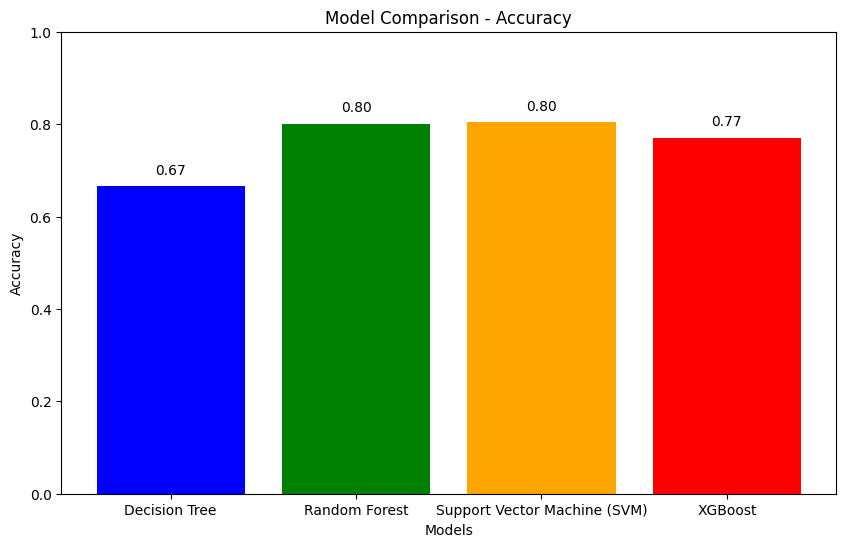

In [28]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(xtrain, ytrain)
decision_tree_predictions = decision_tree_model.predict(xtest)
decision_tree_accuracy = accuracy_score(ytest, decision_tree_predictions)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", classification_report(ytest, decision_tree_predictions))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(ytest, decision_tree_predictions))

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(xtrain, ytrain)
random_forest_predictions = random_forest_model.predict(xtest)
random_forest_accuracy = accuracy_score(ytest, random_forest_predictions)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:\n", classification_report(ytest, random_forest_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(ytest, random_forest_predictions))

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(xtrain, ytrain)
svm_predictions = svm_model.predict(xtest)
svm_accuracy = accuracy_score(ytest, svm_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Support Vector Machine (SVM) Classification Report:\n", classification_report(ytest, svm_predictions))
print("Support Vector Machine (SVM) Confusion Matrix:\n", confusion_matrix(ytest, svm_predictions))

# XGBoost
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(xtrain, ytrain)
xgboost_predictions = xgboost_model.predict(xtest)
xgboost_accuracy = accuracy_score(ytest, xgboost_predictions)

print("XGBoost Accuracy:", xgboost_accuracy)
print("XGBoost Classification Report:\n", classification_report(ytest, xgboost_predictions))
print("XGBoost Confusion Matrix:\n", confusion_matrix(ytest, xgboost_predictions))

# Store accuracies in a dictionary
accuracies = {
    "Decision Tree": decision_tree_accuracy,
    "Random Forest": random_forest_accuracy,
    "Support Vector Machine (SVM)": svm_accuracy,
    "XGBoost": xgboost_accuracy
}

# Plot accuracies in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1.0)  # Set y-axis limit between 0 and 1 (for accuracy)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')  # Add accuracy values on top of bars
plt.show()


In [ ]:
# plot the accuracies